## Lab 1- Python

Let start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [19]:
import random
x=random.random()
print "The Value of x is", x



The Value of x is 0.444666772585


### Exercise 1.1
Using random, write a function GenerateData(N, mymin, mymax), that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [28]:
# Skeleton
import random

def GenerateData(N,min,max):
    out=[]
    
    while len(out) < N:
        out.append(random.random()*(max-min)+min)#transformation for R(0,1) to Y(min,max)
        
        #out.append(random.uniform(min,max))
            
    return out
    
      

Data=GenerateData(1000,-10,10)

print "Data Type:", type(Data)
print "Data Length:", len(Data)

if len(Data)>0: 
    print "Type of Data Contents:", type(Data[0])
    print "Data Minimum:", min(Data)
    print "Data Maximum:", max(Data)
    


Data Type: <type 'list'>
Data Length: 1000
Type of Data Contents: <type 'float'>
Data Minimum: -9.95893726395
Data Maximum: 9.98611015784


### Exercise 1.2

Write a function that computes the mean of values in a list.

In [29]:
# Skeleton
import math
def mean(Data):
    m=float(sum(Data))/float(len(Data))

    return m

print "Mean of Data:", mean(Data)

Mean of Data: -0.10175794799


### Exercise 1.3

Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of positive entries. 

In [4]:
def where(mylist,myfunc):
    out= [i for i,v in enumerate(mylist) if myfunc(v)]
    
    #in expanded form
    #out=[]
    #for i,v in enumerate(mylist):
     #   if myfunc(v):
      #      out.append(i)
       
    
   
    return out


### Exercise 1.4

The inrange(mymin,mymax) function below returns a function that tests if it's input is between the specified values. Use this function, in conjunction to your solution to 1.3, to demonstrate that your data is "flat". Hint: pick several sub-ranges and show that the number of data point divided by the size of the range is roughly constant. 

True True False False False
True True False False False
Number of Entries passing F1: 352
Number of Entries passing F2: 401
Number of Entries passing F2: 455


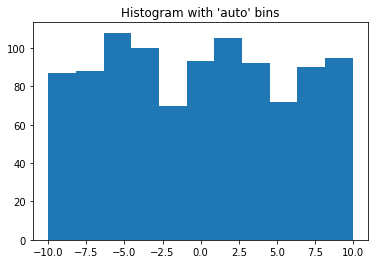

In [25]:
def inrange(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=inrange(0,7)
F2=inrange(0,8)
F3=inrange(0,9)

print F1(0), F1(1), F1(10), F1(15), F1(20)
print F2(0), F2(1), F2(10), F2(15), F2(20)

def isflat(mymin,mymax):
    size = inrange(mymin,mymax)
    num = len(where(Data,size))
    sub_range = mymax - mymin
    return sub_range/num
print  "Number of Entries passing F1:", len(where(Data,F1))
print  "Number of Entries passing F2:", len(where(Data,F2))
print  "Number of Entries passing F2:", len(where(Data,F3))
#I got this from internet
import matplotlib.pyplot as plt
plt.hist(Data, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()




### Exercise 1.5

Repeat Exercise 1.5 using the built in python functions sum,filter and map instead of your solution to 1.3. 

In [10]:

def where(mylist,myfunc):
    
    # filtering out False values but doesnot gives the indices for true value, still works 
    out = filter(lambda x: x ==True,map(myfunc,mylist)) 
    return out

### Exercise 1.6

Write a new function called GenerateDataFromFunction(N,mymin,mymax,myfunc), that instead of generating a flat distribution, generates a distribution with functional form coded in myfunc. Note that myfunc will always be > 0.  

Use your function to generate 1000 numbers that are Gaussian distributed, using the Gaussian function below. Confirm the mean of the data is close to mean you specify when building the Gaussian. 

Hint: A simple, but slow, solution is to a draw random number test_x within the specified range and another number p between the min and max of the function (which you will have to determine). If p<=function(test_x), then place test_x on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, N. For this problem, it's OK to determine the min and max by numerically sampling the function.  



In [30]:
import random 
import math

def GenerateDataFromFunction(N,mymin,mymax,myfunc):
    out = []
    #creating a list with all values of fuction
    func_list= map(myfunc,[i for i in range(mymin,mymax)])
    
    
    #find max of function
    max_num = 0
    min_num = 0
    for i,v in enumerate(func_list):
        if max_num < v:
            max_num = v
           
    #find min of a function
    for i,v in enumerate (func_list):
        if min_num > v:
            min_num = v
    
    while len(out)<=N: #should this be len(out)<N ?
        
        test_x= random.random()*(mymax-mymin)+mymin
        p=random.random()*(max_num - min_num) +min_num
    
        if p <= myfunc(test_x):
            out.append(test_x)
        
    
    #len(out)
   
    
    return out



0.0130267664985


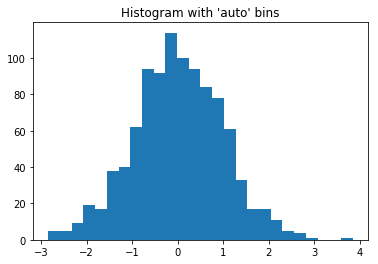

In [31]:
import math

def gaussian(mean, sigma):
    def f(x):
        return math.exp(-((x-mean)**2)/(2*sigma**2))/math.sqrt(math.pi*sigma)
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)

### BEGIN SOLUTION
#GenerateDataFromFunction(1000,0,10,g2)
Data = GenerateDataFromFunction(1000,-100,100,g1)
print mean(Data)
    
### END SOLUTION
import matplotlib.pyplot as plt
plt.hist(Data, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()
